In [1]:
%reload_ext autoreload
%autoreload 2

In [14]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from visualstoryteller.mixutils import crop_center, load_image, load_content_image, save_image
import matplotlib.pylab as plt
import numpy as np
import functools
import requests
from PIL import Image
from io import BytesIO
import random

@functools.lru_cache(maxsize=None)
def load_here_content_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  # image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  # img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  r = requests.get(image_url)
  im = Image.open(BytesIO(r.content))
  img = np.array(im).reshape((im.size[1],im.size[0],3))
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = np.expand_dims(img, axis = 0)
    #img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return (im, img, np.array(im), im.size[1],im.size[0])


class ContentImg():

    per_page = 200
    pixabay = 'https://pixabay.com/api/'
    pixabay_id = os.getenv('PIXABAY_KEY')

    def __init__(self):
        pass

        params = {
            'key': self.pixabay_id,
            'q': '+'.join(words),
            'image_type': 'photo',
            'safesearch': True,
            'per_page': self.per_page,
            'colors': "grayscale"
        }

        response = requests.get(self.pixabay, params=params)
        json_file = response.json()
        if json_file['total'] > 0:
            length_results = len(json_file['hits'])
            index = random.randint(0, length_results - 1)
            img_link = json_file['hits'][index]['webformatURL']
            author_name = json_file['hits'][index]['user']
            return img_link, author_name, '' # empty as author_profile
        # else try unsplash
        print('unsplash or nothing')
        return "nothing", words[0], "nothing"

In [15]:
list_of_words = ['car', 'house', 'fly', 'people', 'demo']
pics_info = []

In [4]:
from visualstoryteller.contentunsplash import ContentImgUnsplash

cnt = ContentImgUnsplash()
cnt.get_content(['overwhelmingz'])


('nothing', 'overwhelmingz', 'nothing')

In [1]:
contenturl = 'https://media-exp1.licdn.com/dms/image/C4E03AQF769EQZok1xQ/profile-displayphoto-shrink_800_800/0/1529940108624?e=1620864000&v=beta&t=PKINWIIzgGYkDVKESkqQPsXneXtai3vnM4os0znNXcE'

In [2]:
styleurl = 'https://media-exp1.licdn.com/dms/image/C4E03AQF769EQZok1xQ/profile-displayphoto-shrink_800_800/0/1529940108624?e=1620864000&v=beta&t=PKINWIIzgGYkDVKESkqQPsXneXtai3vnM4os0znNXcE'

In [8]:
from visualstoryteller.mixmorepics import GetStylePics
from visualstoryteller.mixutils import load_local_image

In [9]:
cc = GetStylePics()

In [13]:
cnt = load_local_image('/Users/ger/Downloads/greg_face.jpg')
stl = load_local_image('/Users/ger/Downloads/greg_face.jpg')


In [14]:
cc.content_image = [cnt]
cc.style_image = [stl]

In [15]:
cc.stylize()

In [16]:
stg = cc.stylized_image[0]

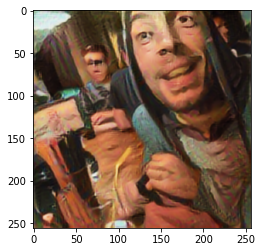

In [20]:
import matplotlib.pyplot as plt
plt.imshow(stg[0])